# Calculating Larger Heights Using the Inclinometer

The purpose of this juptyer notebook is to take a csv or Excel input file of angle readings and return the height of a larger object like a building or room. This notebook is taylored to work with the ouput from the Physics Toolbox Sensor Suite app for the iPhone, but we have tried to make it easily modified to fit the output of other applications. To generate the necessary data to calculate height we set up an apparatus attaching a laser pointer to the phone. We then began the recording with the phone flat on the ground and then lifted the top of the phone until the laser pointer reached the height of the room or building. After pausing the recording is stopped. Using the data we approximated the height with trigonometry. Note we also need to know the distance from the phone of the object.

### The Input File Specification

What follows assumes that the input.csv file resembles:
```
time,yaw,pitch,roll
48:01.8,	2.81,	-1.6,	-1.91,
48:01.9,	2.82,	-1.62,	-1.99,
48:02.0,	2.81,	-1.57,	-1.92,
48:02.1,	2.81,	-1.37,	-1.8
```
The ```time``` column has a time stamp for each data point given with a date and time. The same app for android users gives time data as elapsed time in units of seconds. 

The inclinometer sensor calculates the inclination of the phone in the $x-$, $y-$, $z-$ directions. "Yaw" refers to the $z-$axis and "roll" refers to the $y-$axis. We are interested in "pitch" which refers to rotation about the $x-$ axis. Given the $x-$ axis of an iPhone runs through the width of the phone. 

_Time Values:_ examining the time stamp values above, we see they are given as a time in the day as opposed to elapsed time. In the worksheet we will convert this to elapsed time using the datetime library. 

In [1]:
# These are the necessary libraries to plot, deal with arrays, and convert time from day to seconds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import math

### Data Collection 

To generate the necessary data to calculate height we set up an appartus involving an iPhone 8, a laser pointer, rubber band, and binder clip. The laser pointer is attached to the iPhone using a rubber band. Then the binder clip is used to keep the button pressed. We then began the recording with the phone flat on the ground with the laser pointer pointed at the base of a room or building. Then we raise the pointer until it reaches the top where we hold it as steady as possible. A tri-pod would improve this process but is not necessary of the accuracy that we desire. It is also necessary that we use a measuring device (or the accerometer on the phone) to find the distance from where the phone is positioned to the base of the object.

In [2]:
# Read the data from the inclinometer sensor
# Use pd.read_excel for excel files
# The second and third arguments are necessary for time conversion later
raw = pd.read_csv("laserAllyRoom.csv",index_col=0,parse_dates=True)


#raw = pd.read_excel("laserAllyRoom.xlsx")
raw.head()

,yaw,pitch,roll
time,,,
48:01.8,2.81,-1.60,-1.91
48:01.9,2.82,-1.62,-1.99
48:02.0,2.81,-1.57,-1.92
48:02.1,2.81,-1.37,-1.80
48:02.2,2.80,-1.07,-1.75


In [3]:
# Manipulating raw tim values so they are given in elapsed seconds and have type float
t = np.array(raw.index)
for i in range(len(t)):
    t[i] = t[i][3:]
    t[i] = float(t[i])

### Finding the Angle from the Data
Below we plot the time vs. angle. Since we hold the laser pointer at the height of the object for a period of time, it is clear there is a period in our data where the angle is almost constat. Using the plot, we can approximate the angle formed betweent the ground and the building from our phone. In the plot below it appears from 14 to 20 seconds the laser pointed was pointed at the top of the building. At this angle appears to be approximately 60 degress, but we will take an average of the data over the period of time to find the best approximation of our angle.

Text(0, 0.5, 'Angle (degrees)')

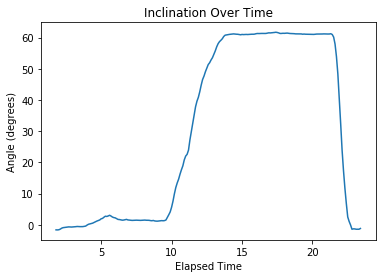

In [4]:
angle = np.array(raw['pitch'])
plt.plot(t,angle)
plt.title('Inclination Over Time')
plt.xlabel('Elapsed Time')
plt.ylabel('Angle (degrees)') 

In [14]:
# Calculating the average from 14 to 15 seconds
t1 = np.where(t == 14.0) # index 122
t2 = np.where(t == 20.0) # index 182
average = np.cumsum(angle[122:182+1])
end_angle = average[-1] / (183 - 122)
beg_angle = angle[0]
final_angle = end_angle - beg_angle
final_angle

62.829836065573765

### A Quick Triginometry Review

We have now calculated the angle, let's call it $\theta$ formed between the base of the object, the phone, and the height of the object. We also know the "adjacent" length, or the length from the phone to the base of the object. We'll refer to this length as $l$. We wish to find the "opposite" length, so we can use the tangent function. $$ \tan(\theta) = \frac{opposite}{adjacent} \implies height = l\tan(\theta)$$

In [11]:
# We measured the length from the phone center to the wall to be 1.61 meters
length = 1.61
# Converting our degree measurement to radians
rad = final_angle*(math.pi / 180)
# Remembering our triginometry
height = math.tan(rad) * length
print("The height of the room is", round(height,2), "meters.")

The height of the room is 3.14 meters.
